<a href="https://colab.research.google.com/github/danon6868/BI-ml-course/blob/main/lecture_8_neural_networks_part2/homework/FC_NN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Всем привет! Сегодня вы впервые попробуете написать свою собственную нейронную сеть и попробовать ее обучить. Мы будем работать с картинками, но пока что не совсем тем способом, которым лучше всего это делать, но должно получиться неплохо.

Будем работать с [датасетом](https://github.com/rois-codh/kmnist) `Kuzushiji-MNIST` (`KMNIST`). Это рукописные буквы, изображения имеют размер (28, 28, 1) и разделены на 10 классов, по ссылке можно прочитать подробнее.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from IPython.display import clear_output

## Загрузка данных

Сейчас мы будем использовать встроенные данные, но в реальности приходится писать свой класс для датасета (Dataset), у которого реализовывать несколько обязательных методов (напр, `__getitem__`), но это обсудим уже потом.

In [2]:
import torchvision
from torchvision.datasets import KMNIST


# Превращает картинки в тензоры
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor()])

# Загрузим данные (в переменных лежат объекты типа `Dataset`)
# В аргумент `transform` мы передаем необходимые трансформации (ToTensor)
trainset = KMNIST(root="./KMNIST", train=True, download=True, transform=transform)
testset = KMNIST(root="./KMNIST", train=False, download=True, transform=transform)

clear_output()

Определим даталоадеры, они нужны, чтобы реализовывать стохастический градиентный спуск (то есть мы не хотим считывать в оперативную память все картинки сразу, а делать это батчами).

In [105]:
from torch.utils.data import DataLoader


# Можно оставить таким
batch_size = 256

trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

Получено перезапуском модели с разными batch_size'ами:

In [ ]:
# all_losses = {}
# all_losses[16] = loss_history
# all_losses[256] = loss_history
# all_losses[1024] = loss_history
# all_losses[64] = loss_history

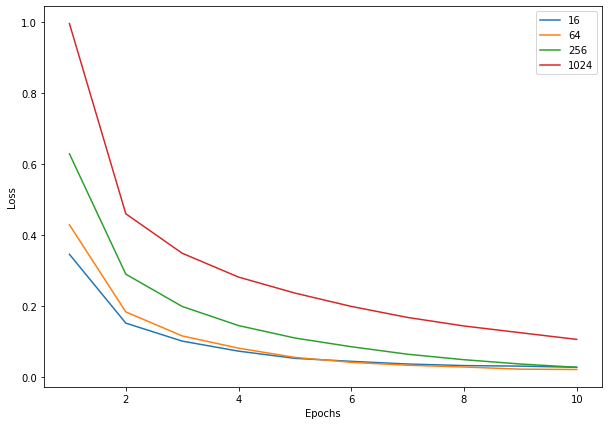

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot([i+1 for i in range(n_epochs)], all_losses[16], label='16')
plt.plot([i+1 for i in range(n_epochs)], all_losses[64], label='64')
plt.plot([i+1 for i in range(n_epochs)], all_losses[256], label='256')
plt.plot([i+1 for i in range(n_epochs)], all_losses[1024], label='1024')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Подумайте, как может влиять на скорость обучения параметр `batch_size`, почему вы так считаете?

**Ответ:** маленький размер батча приведёт к большому количеству итераций и более долгому обучению (ведь forward и backward выполняются $\frac{Размер\_датасета}{Размер\_батча}$ раз). 

Кроме того, маленькие батчи будут подвержены шумам, а слишком большие батчи не смогут асимптотически сойтись к такому же малому значению Loss'а

$~$

Посмотрим на какую-нибудь картинку:

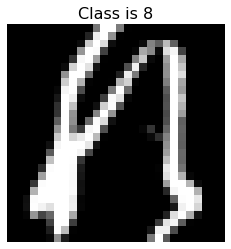

In [4]:
plt.imshow(trainset[0][0].view(28, 28).numpy(), cmap="gray")
plt.axis("off")
plt.title(f"Class is {trainset[0][1]}", fontsize=16);

### Задание 1. Смотрим на картинки

**2** балла

Нарисуйте на одном графике изображения всех 10 классов:

⣿⣿⣿⣿⣿⣿⠿⢋⣥⣴⣶⣶⣶⣬⣙⠻⠟⣋⣭⣭⣭⣭⡙⠻⣿⣿⣿⣿⣿<br>
⣿⣿⣿⣿⡿⢋⣴⣿⣿⠿⢟⣛⣛⣛⠿⢷⡹⣿⣿⣿⣿⣿⣿⣆⠹⣿⣿⣿⣿<br>
⣿⣿⣿⡿⢁⣾⣿⣿⣴⣿⣿⣿⣿⠿⠿⠷⠥⠱⣶⣶⣶⣶⡶⠮⠤⣌⡙⢿⣿<br>
⣿⡿⢛⡁⣾⣿⣿⣿⡿⢟⡫⢕⣪⡭⠥⢭⣭⣉⡂⣉⡒⣤⡭⡉⠩⣥⣰⠂⠹<br>
⡟⢠⣿⣱⣿⣿⣿⣏⣛⢲⣾⣿⠃⠄⠐⠈⣿⣿⣿⣿⣿⣿⠄⠁⠃⢸⣿⣿⡧<br>
⢠⣿⣿⣿⣿⣿⣿⣿⣿⣇⣊⠙⠳⠤⠤⠾⣟⠛⠍⣹⣛⣛⣢⣀⣠⣛⡯⢉⣰<br>
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⡶⠶⢒⣠⣼⣿⣿⣛⠻⠛⢛⣛⠉⣴⣿⣿<br>
⣿⣿⣿⣿⣿⣿⣿⡿⢛⡛⢿⣿⣿⣶⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⡈⢿⣿<br>
⣿⣿⣿⣿⣿⣿⣿⠸⣿⡻⢷⣍⣛⠻⠿⠿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⢇⡘⣿<br>
⣿⣿⣿⣿⣿⣿⣿⣷⣝⠻⠶⣬⣍⣛⣛⠓⠶⠶⠶⠤⠬⠭⠤⠶⠶⠞⠛⣡⣿<br>
⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣶⣬⣭⣍⣙⣛⣛⣛⠛⠛⠛⠿⠿⠿⠛⣠⣿⣿<br>
⣦⣈⠉⢛⠻⠿⠿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠿⠛⣁⣴⣾⣿⣿⣿⣿<br>
⣿⣿⣿⣶⣮⣭⣁⣒⣒⣒⠂⠠⠬⠭⠭⠭⢀⣀⣠⣄⡘⠿⣿⣿⣿⣿⣿⣿⣿<br>
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣦⡈⢿⣿⣿⣿⣿⣿<br>





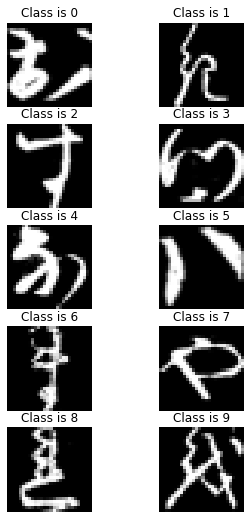

In [17]:
images = {}

X_PLOTSIZE = 5
Y_PLOTSIZE = 2
fig, axs = plt.subplots(X_PLOTSIZE, Y_PLOTSIZE, figsize = (5, 9))

# записываем как выглядят картинки в словарь
for image, label in trainset:
    images[label] = image

# отрисовываем
for i in range(X_PLOTSIZE):
    for j in range(Y_PLOTSIZE):
        curr_class = Y_PLOTSIZE*i + j
        axs[i, j].imshow(images[curr_class].view(28, 28).numpy(), cmap="gray")
        axs[i, j].axis("off")
        axs[i, j].title.set_text(f"Class is {curr_class}")

### Задание 2. Строим свой первый MLP

**4** балла

MLP (multilayer perceptron) или нейронная сеть из полносвязных (линейных) слоев, это мы уже знаем.

Опишите структуру сети: 3 полносвязных слоя + функции активации на ваш выбор. **Подумайте** про активацию после последнего слоя!

Сеть на выходе 1 слоя должна иметь 256 признаков, на выходе из 2 128 признаков, на выходе из последнего столько, сколько у вас классов.
 
https://pytorch.org/docs/stable/nn.html?highlight=activation#non-linear-activations-weighted-sum-nonlinearity

In [136]:
import torch.nn as nn
import torch.nn.functional as F

class FCNet(nn.Module):
    def __init__(self, act_f='relu'):
        super().__init__() #  это надо помнить!
        ## YOUR CODE HERE

        act_function = {'relu': nn.ReLU(), 
                        'sigmoid': nn.Sigmoid(), 
                        'tanh': nn.Tanh(), 
                        'gelu': nn.GELU(),
                        'custom': CustomReLU()
                        }

        MLP_module = []
        MLP_module.append(nn.Flatten())
        MLP_module.append(nn.Linear(in_features=28*28, out_features=256))
        MLP_module.append(act_function[act_f])
        MLP_module.append(nn.Linear(in_features=256, out_features=128))
        MLP_module.append(act_function[act_f])
        MLP_module.append(nn.Linear(in_features=128, out_features=10))

        self.layers = nn.Sequential(*MLP_module)

    def forward(self, x):  # Forward вызывается внутри метода __call__ родительского класса
        ## x -> тензор размерности (BATCH_SIZE, N_CHANNELS, WIDTH, HEIGHT)
        ## надо подумать над тем, что у нас полносвязные слои принимают векторы

        logits = self.layers(x)

        return logits

In [33]:
my_model = FCNet()

print(my_model.parameters)

print("Узлы и веса: ", [p.numel() for p in my_model.parameters()])
print("Всего параметров: ", sum(p.numel() for p in my_model.parameters()))

<bound method Module.parameters of FCNet(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=10, bias=True)
  )
)>
Узлы и веса:  [200704, 256, 32768, 128, 1280, 10]
Всего параметров:  235146


Сколько обучаемых параметров у вашей модели (весов и смещений)?

**Ответ:** 235146

### Задание 3. Напишите код для обучения модели

**5** баллов

Можно (и нужно) подглядывать в код семинара по пайторчу. Вам нужно создать модель, определить функцию потерь и оптимизатор (начнем с `SGD`). Дальше нужно обучать модель, при помощи тренировочного `Dataloader'a` и считать лосс на тренировочном и тестовом `Dataloader'ах`.

Напишем функцию для рассчета `accuracy`:

In [25]:
def get_accuracy(model, dataloader):
    """
    model - обученная нейронная сеть
    dataloader - даталоадер, на котором вы хотите посчитать accuracy
    """
    correct = 0
    total = 0
    with torch.no_grad(): # Тензоры внутри этого блока будут иметь requires_grad=False
        for images, labels in dataloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    
    return accuracy

#### Основной цикл обучения

Этот код можно (и зачастую нужно) выносить в отдельную функцию, но пока что можете это не делать, все по желанию)

In [58]:
# Создадим объект модели
fc_net = FCNet()
# Определим функцию потерь
loss_function = nn.CrossEntropyLoss()
# Создадим оптимизатор для нашей сети
lr = 0.001 # скорость обучения
optimizer = torch.optim.Adam(fc_net.parameters(), lr=lr)

Напишите цикл обучения. Для начала хватит 10 эпох. Какое значение `accuracy` на тестовой выборке удалось получить?

**ОТВЕТ:** 0.901

In [59]:
n_epochs = 10
loss_history = []

## YOUR CODE HERE
for epoch in range(n_epochs):
    epoch_loss = 0
    for images, labels in trainloader: # Получаем батч тренировочных картинок
        optimizer.zero_grad() # чтобы не было как в лог регрессии, когда мы не обнуляли градиенты
        outputs = fc_net(images) # делаем предсказания
        loss = loss_function(outputs, labels) # считаем лосс
        loss.backward() # считаем градиенты
        optimizer.step() # делаем шаг градиентного спуска

        epoch_loss += loss.item()

    loss_history.append(epoch_loss/len(trainloader))

    print(f"Epoch={epoch+1} loss={loss_history[epoch]:.4f}")

Epoch=1 loss=0.6181
Epoch=2 loss=0.2873
Epoch=3 loss=0.1959
Epoch=4 loss=0.1428
Epoch=5 loss=0.1079
Epoch=6 loss=0.0825
Epoch=7 loss=0.0607
Epoch=8 loss=0.0466
Epoch=9 loss=0.0334
Epoch=10 loss=0.0259


In [60]:
get_accuracy(fc_net, testloader)

0.903

### Задание 4. Изучение влияния нормализации

**3** балла

Вы могли заметить, что мы забыли провести нормализацию наших данных, а для нейронных сетей это может быть очень критично.

Нормализуйте данные.

* Подсчитайте среднее значение и стандартное отклонение интенсивности пикселей для всех тренировочных данных
* Нормализуйте данные с использованием этих параметров (используйте трансформацию `Normalize`)


Оцените влияние нормировки данных.

In [106]:
temp_loader = DataLoader(trainset, batch_size=len(trainset))  # большой батч на все данные

In [107]:
big_batch = next(iter(temp_loader))[0]
big_batch.shape

torch.Size([60000, 1, 28, 28])

In [108]:
mean = big_batch.mean(dim=(0, 2, 3)).item()  ## среднее значение
std = big_batch.std(dim=(0, 2, 3)).item()    ## std
print(mean, std)

transform_with_norm = torchvision.transforms.Compose([
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(mean, std)
            ])

trainset.transform = transform_with_norm 
testset.transform = transform_with_norm

0.19176220893859863 0.3483428359031677


In [110]:
fc_net = FCNet()
loss_function = nn.CrossEntropyLoss()
lr = 0.001
optimizer = torch.optim.Adam(fc_net.parameters(), lr=lr)

In [111]:
n_epochs = 10
loss_history = []

## YOUR CODE HERE
for epoch in range(n_epochs):
    epoch_loss = 0
    for images, labels in trainloader: 
        optimizer.zero_grad()
        outputs = fc_net(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    loss_history.append(epoch_loss/len(trainloader))

    print(f"Epoch={epoch+1} loss={loss_history[epoch]:.4f}")

Epoch=1 loss=0.4513
Epoch=2 loss=0.1868
Epoch=3 loss=0.1212
Epoch=4 loss=0.0834
Epoch=5 loss=0.0558
Epoch=6 loss=0.0409
Epoch=7 loss=0.0268
Epoch=8 loss=0.0186
Epoch=9 loss=0.0173
Epoch=10 loss=0.0157


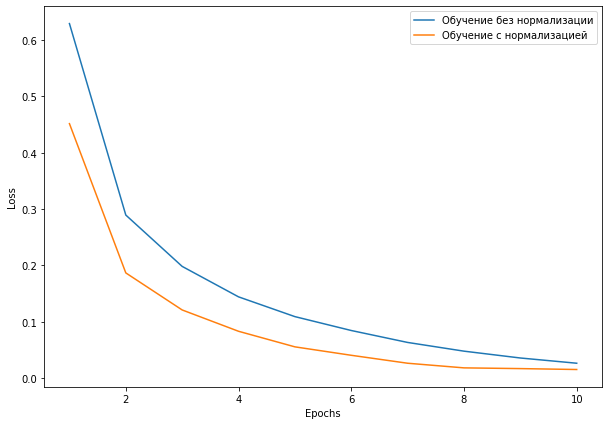

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot([i+1 for i in range(n_epochs)], all_losses[256], label='Обучение без нормализации')
plt.plot([i+1 for i in range(n_epochs)], loss_history, label='Обучение с нормализацией')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [113]:
get_accuracy(fc_net, testloader)

0.9048

Как изменилась `accuracy` после нормализации?

**Ответ:** Улучшилась на $.0018$ пункта.

### Задание 5. Изучение влияния функции активации

**3** балла

Исследуйте влияние функций активации на скорость обучения и точность предсказаний модели.

Используйте три функции:

* [Sigmoid](https://pytorch.org/docs/stable/nn.functional.html#sigmoid)
* [GELU](https://pytorch.org/docs/stable/nn.functional.html#gelu)
* [Tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html#torch.nn.Tanh)

In [119]:
losses_for_act_f = {}
accuracies = {}

for act_function in ['relu', 'sigmoid', 'tanh', 'gelu']:
    fc_net = FCNet(act_f=act_function)
    loss_function = nn.CrossEntropyLoss()
    lr = 0.001
    optimizer = torch.optim.Adam(fc_net.parameters(), lr=lr)


    n_epochs = 10
    loss_history = []
    for epoch in range(n_epochs):
        epoch_loss = 0
        for images, labels in trainloader: 
            optimizer.zero_grad()
            outputs = fc_net(images)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        loss_history.append(epoch_loss/len(trainloader))

    losses_for_act_f[act_function] = loss_history
    accuracies[act_function] = get_accuracy(fc_net, testloader)

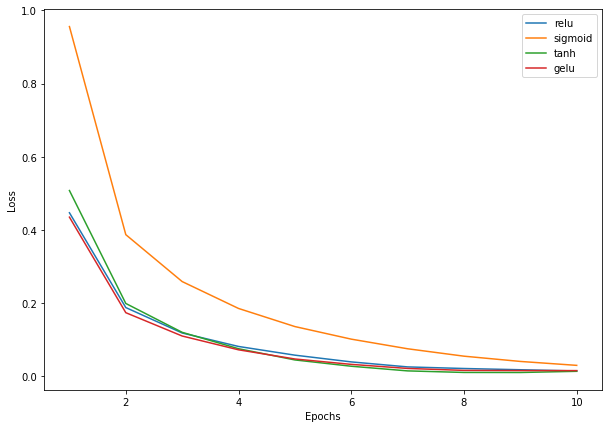

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot([i+1 for i in range(n_epochs)], losses_for_act_f['relu'], label='relu')
plt.plot([i+1 for i in range(n_epochs)], losses_for_act_f['sigmoid'], label='sigmoid')
plt.plot([i+1 for i in range(n_epochs)], losses_for_act_f['tanh'], label='tanh')
plt.plot([i+1 for i in range(n_epochs)], losses_for_act_f['gelu'], label='gelu')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [121]:
for act_function in ['relu', 'sigmoid', 'tanh', 'gelu']:
    print(f'Accuracy for {act_function} = {accuracies[act_function]}')

Accuracy for relu = 0.8956
Accuracy for sigmoid = 0.8929
Accuracy for tanh = 0.8866
Accuracy for gelu = 0.9006


С использованием какой функции активации удалось досчить наибольшей `accuracy`?

**ОТВЕТ:** GELU

### Задание 6. Другие оптимизаторы

**4** балла

Исследуйте влияние оптимизаторов на скорость обучения и точность предсказаний модели.

Попробуйте следующие:

* [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)
* [RMSprop](https://pytorch.org/docs/stable/generated/torch.optim.RMSprop.html#torch.optim.RMSprop)
* [Adagrad](https://pytorch.org/docs/stable/generated/torch.optim.Adagrad.html#torch.optim.Adagrad)

Вам нужно снова обучить 3 модели и сравнить их перформанс (функцию активации используйте ту, которая показала себя лучше всего).

In [122]:
optimizers = [torch.optim.Adam, torch.optim.RMSprop, torch.optim.Adagrad]

losses_for_opts = {}
accuracies = {}

for optim in optimizers:
    fc_net = FCNet(act_f='gelu')
    loss_function = nn.CrossEntropyLoss()
    lr = 0.001
    optimizer = optim(fc_net.parameters(), lr=lr)


    n_epochs = 10
    loss_history = []
    for epoch in range(n_epochs):
        epoch_loss = 0
        for images, labels in trainloader: 
            optimizer.zero_grad()
            outputs = fc_net(images)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        loss_history.append(epoch_loss/len(trainloader))

    losses_for_opts[optim] = loss_history
    accuracies[optim] = get_accuracy(fc_net, testloader)

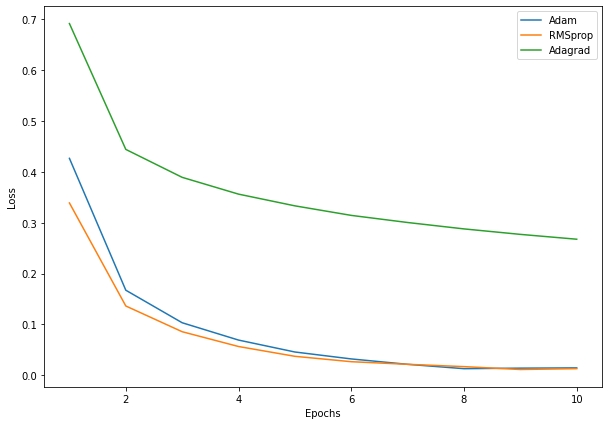

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot([i+1 for i in range(n_epochs)], losses_for_opts[torch.optim.Adam], label='Adam')
plt.plot([i+1 for i in range(n_epochs)], losses_for_opts[torch.optim.RMSprop], label='RMSprop')
plt.plot([i+1 for i in range(n_epochs)], losses_for_opts[torch.optim.Adagrad], label='Adagrad')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [134]:
for optim in optimizers:
    print(f'Accuracy for {optim.__name__} = {accuracies[optim]}')

Accuracy for Adam = 0.8959
Accuracy for RMSprop = 0.8909
Accuracy for Adagrad = 0.8173


**ОТВЕТ:** Adagrad'у плохо. Лучший результат у Adam.

### Задание 7. Реализация ReLU

**4** балла

Самостоятельно реализуйте функцию активации ReLU.
Замените в уже обученной модели функцию активации на вашу. Убедитесь что ничего не изменилась.

In [144]:
class CustomReLU(nn.Module):     
    def __init__(self):
        super().__init__()

    def forward(self, x):
        # YOUR CODE HERE
        # если элемент x < 0, то 0, если >= 0, то x
        x = torch.maximum(x, torch.tensor(0))
        return x

Заново обучите модель и проверьте правильность реализации `CustomReLU`.

In [145]:
fc_net = FCNet(act_f='custom')
loss_function = nn.CrossEntropyLoss()
lr = 0.001
optimizer = torch.optim.Adam(fc_net.parameters(), lr=lr)

In [146]:
n_epochs = 10
loss_history = []
for epoch in range(n_epochs):
    epoch_loss = 0
    for images, labels in trainloader: 
        optimizer.zero_grad()
        outputs = fc_net(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    loss_history.append(epoch_loss/len(trainloader))

In [148]:
get_accuracy(fc_net, testloader)

0.9002

**ОТВЕТ:** ну да, вроде плюс минус тот же результат)

### Задание 8. Генерация картинок

**3** балла

Так как вы снова работаете в командах, то придумайте 3 предложения и сгенерируйте при помощи них 3 картинки, используя телеграм бота [ruDALLE](https://t.me/sber_rudalle_xl_bot). Прикрепите сюда ваши картины.

In [149]:
from IPython.display import Image

# (по одной, самой лучшей картинке)

Играть с крыской


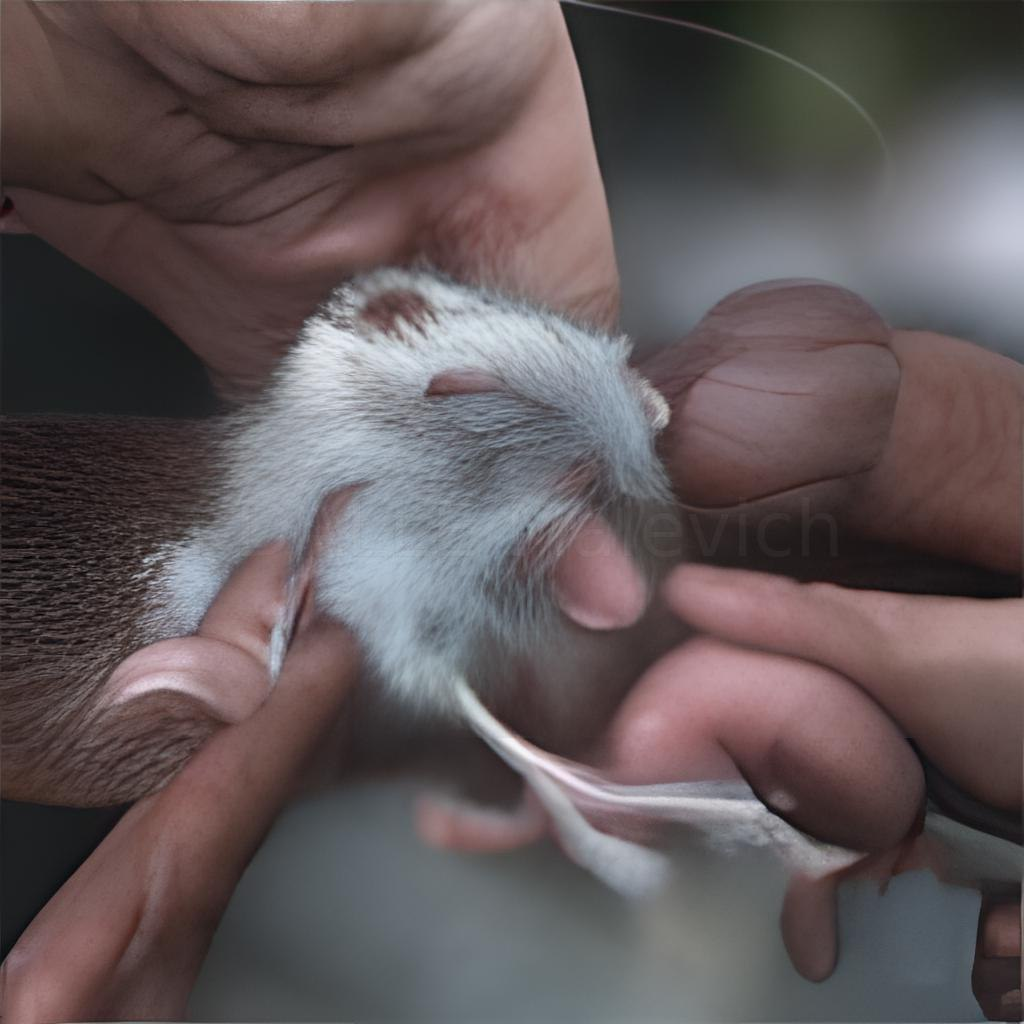

In [152]:
print('Играть с крыской')
Image(filename='/content/photo_2022-04-04_20-52-43.jpg', width=300, height=300) 

Работать в одиночку gonna be like...


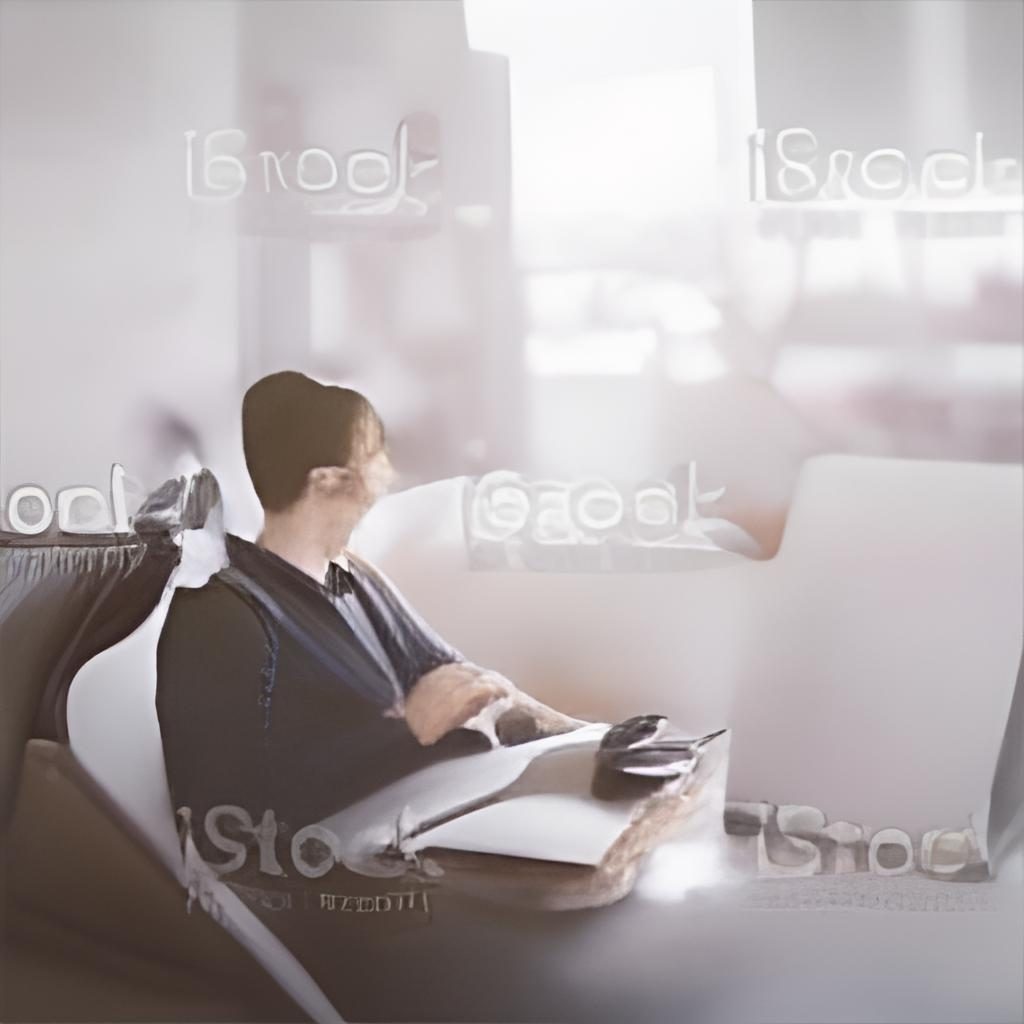

In [155]:
print('Работать в одиночку gonna be like...')
Image(filename='/content/29931d54006e4d99a81a5d48aa38f200_00000.jpg', width=300, height=300) 

Идеал — движение: горе и счастье одинаково могут открыть и закрыть путь


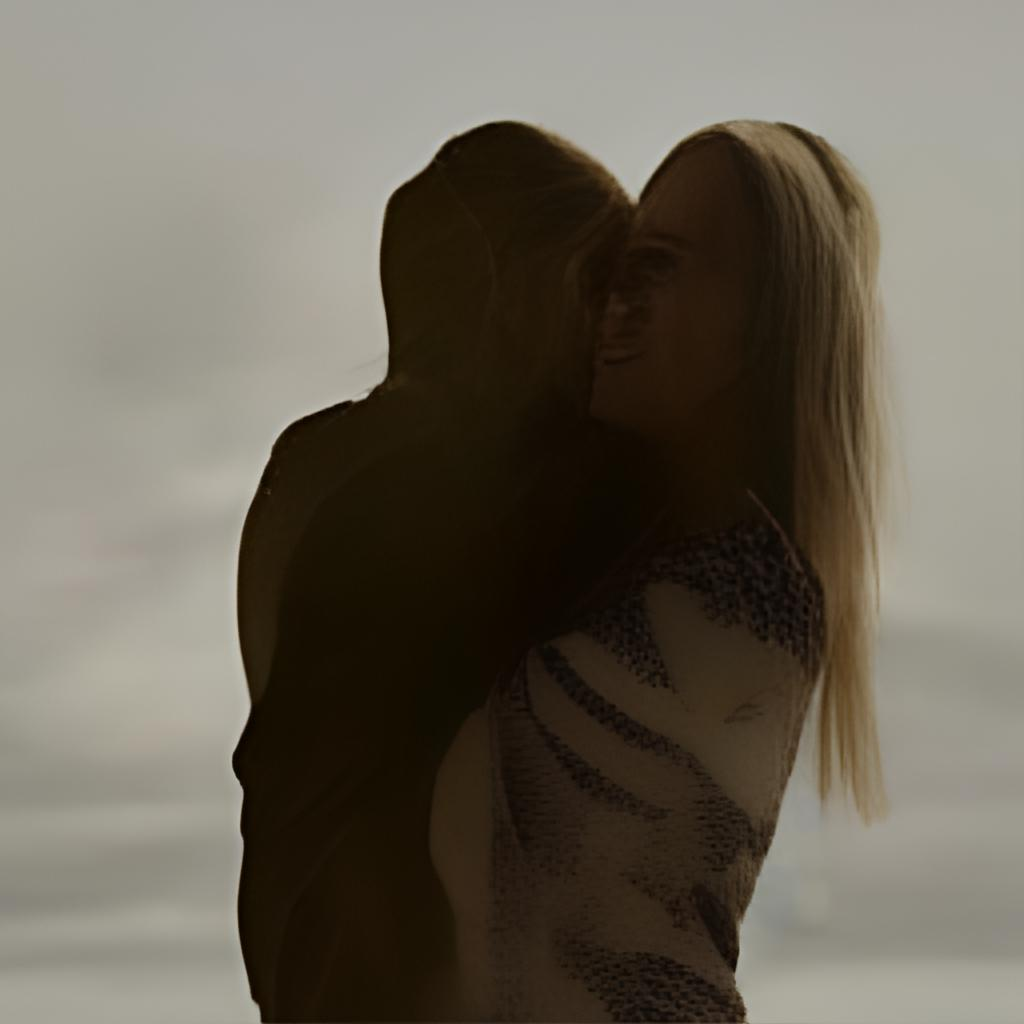

In [154]:
print('Идеал — движение: горе и счастье одинаково могут открыть и закрыть путь')
Image(filename='/content/1b689f23041b4fba86975fe89ebcca10_00000.jpg', width=300, height=300) 